In [1]:
# Import dependencies required to run this code.
%matplotlib notebook
import matplotlib.pyplot as plt
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.ion()

In [2]:
#Load data sets for Iceland. Change the CRS to 32626 with 'to_crs'
roads = gpd.read_file('Iceland/roads.shp').to_crs(32626)
rivers = gpd.read_file('Iceland/waterways.shp').to_crs(32626)
points = gpd.read_file('Iceland/points.shp').to_crs(32626)
counties = gpd.read_file ('Iceland/ISL_adm1.shp').to_crs(32626)
population = gpd.read_file('Iceland/population.shp').to_crs(32626)
outline = gpd.read_file('Iceland/ISL_adm0.shp').to_crs(32626)

<IPython.core.display.Javascript object>


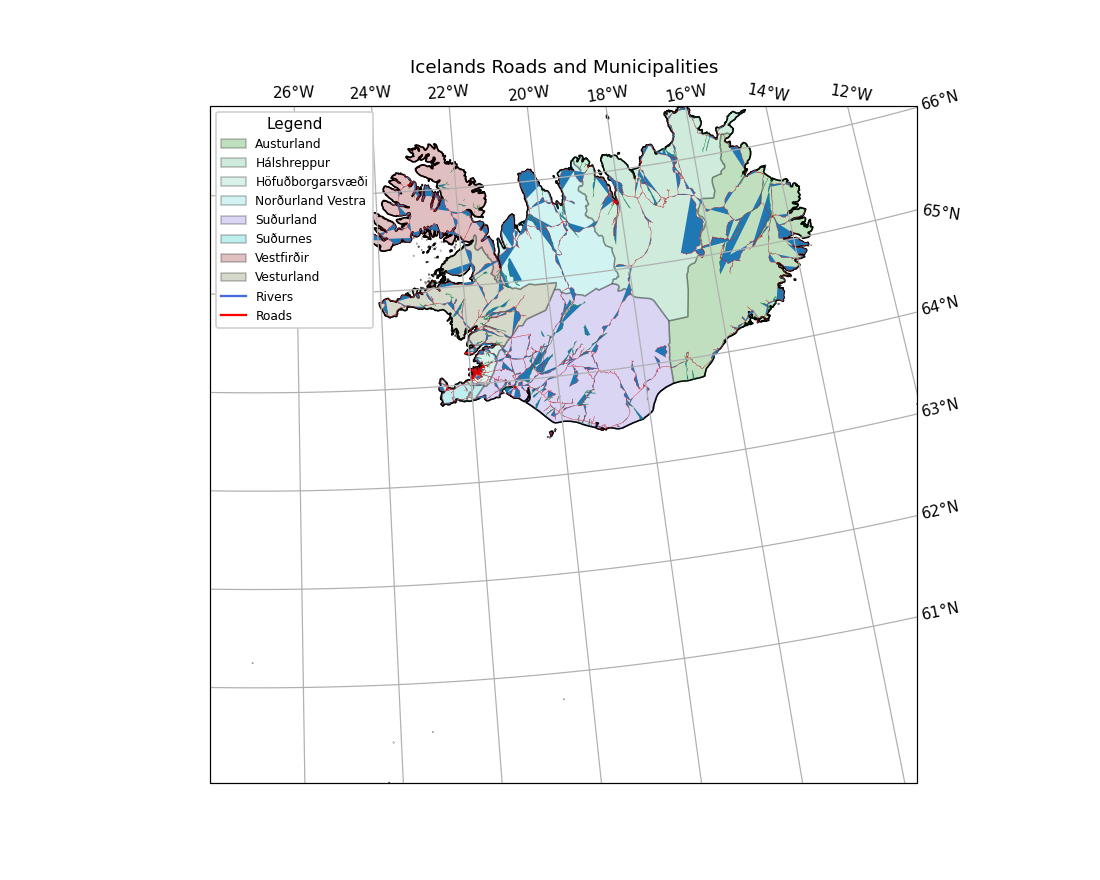

<IPython.core.display.Javascript object>


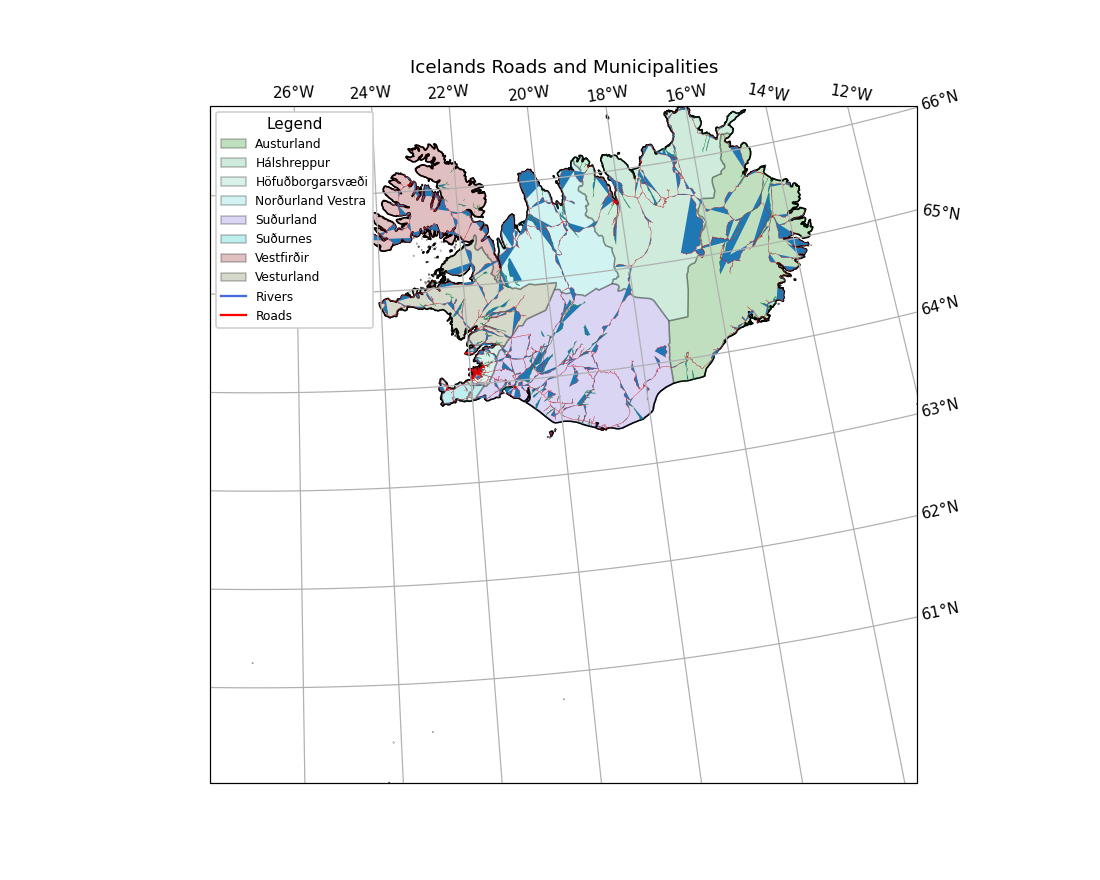

In [3]:
# Set figure outline and Universal Transector Mecrator zone and projections
myFig = plt.figure(figsize=(10,8))

myCRS = ccrs.UTM(26)  

ax = plt.axes(projection=ccrs.UTM(26))

myFig #Shows the data in a figure

In [4]:
# Using mtplotlib create a legend of the features we put in the map
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

<IPython.core.display.Javascript object>


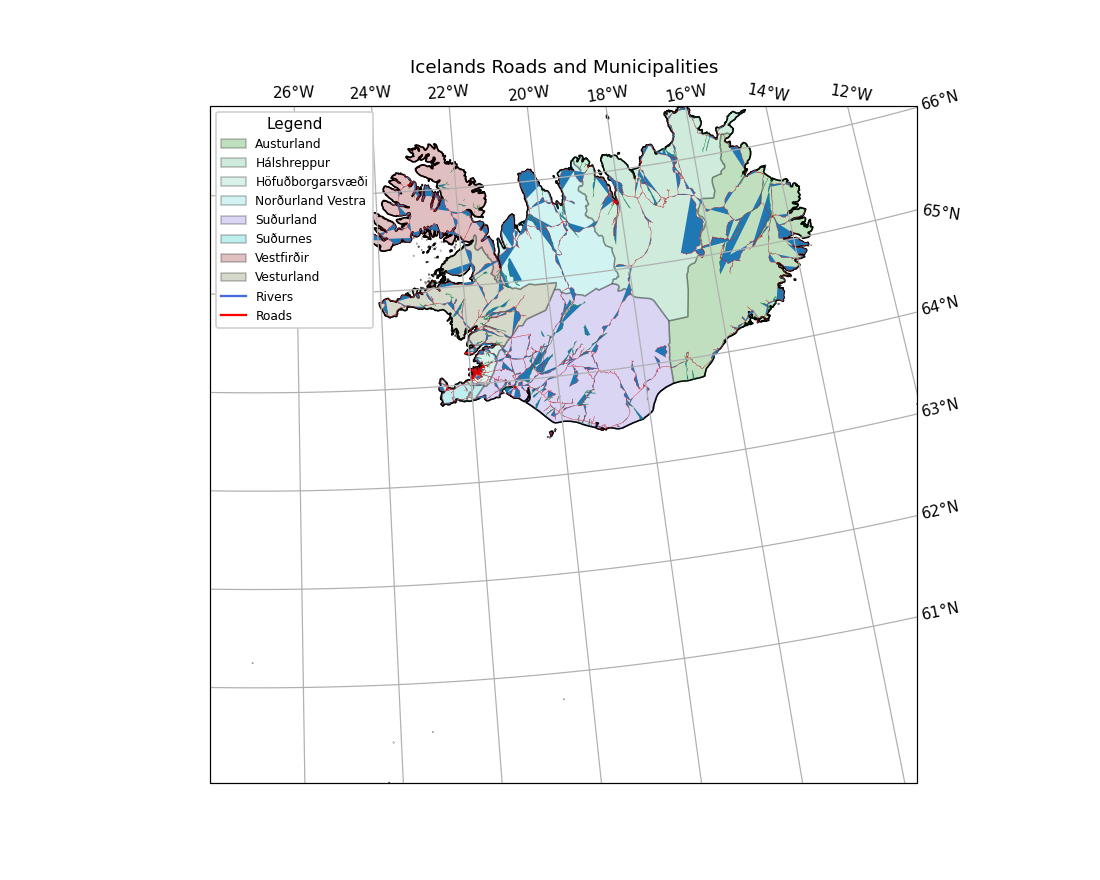

In [5]:
#This sets the outline geometry of the Counties in Iceland 'outline_feature'
outline_feature = ShapelyFeature(outline['geometry'], myCRS, edgecolor='k', facecolor='w')
xmin, ymin, xmax, ymax = outline.total_bounds
ax.add_feature(outline_feature)

ax.set_extent([xmin, xmax, ymin, ymax], crs=myCRS) # Set the extent of the axes on the map

myFig

In [6]:
#This investigates the number of unique county values in the dataset (.unique())
num_counties = len(counties.NAME_1.unique())
print('Number of unique features: {}'.format(num_counties))

Number of unique features: 8


In [7]:
#This summerises the dataframe so we an see the Unique county names
df = pd.read_csv('Iceland\ISL_adm1.csv')
df.head()
df

,OBJECTID,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1
0,1,104,ISL,Iceland,1,Austurland,Landsvæði,Region,NaN,Eastland
1,2,104,ISL,Iceland,2,Hálshreppur,Landsvæði,Region,NaN,Norðurland eystra|Northland East
2,3,104,ISL,Iceland,3,Höfuðborgarsvæði,Landsvæði,Region,NaN,Capital|Reykjavik and Reykjane
3,4,104,ISL,Iceland,4,Norðurland vestra,Landsvæði,Region,NaN,Northland West
4,5,104,ISL,Iceland,5,Suðurland,Landsvæði,Region,NaN,Southland|South
5,6,104,ISL,Iceland,6,Suðurnes,Kaupstadir,Independent Town,NaN,Southern Peninsula
6,7,104,ISL,Iceland,7,Vestfirðir,Landsvæði,Region,NaN,Western Fjords|Western Peninsula
7,8,104,ISL,Iceland,8,Vesturland,Landsvæði,Region,NaN,Westland|West


<IPython.core.display.Javascript object>


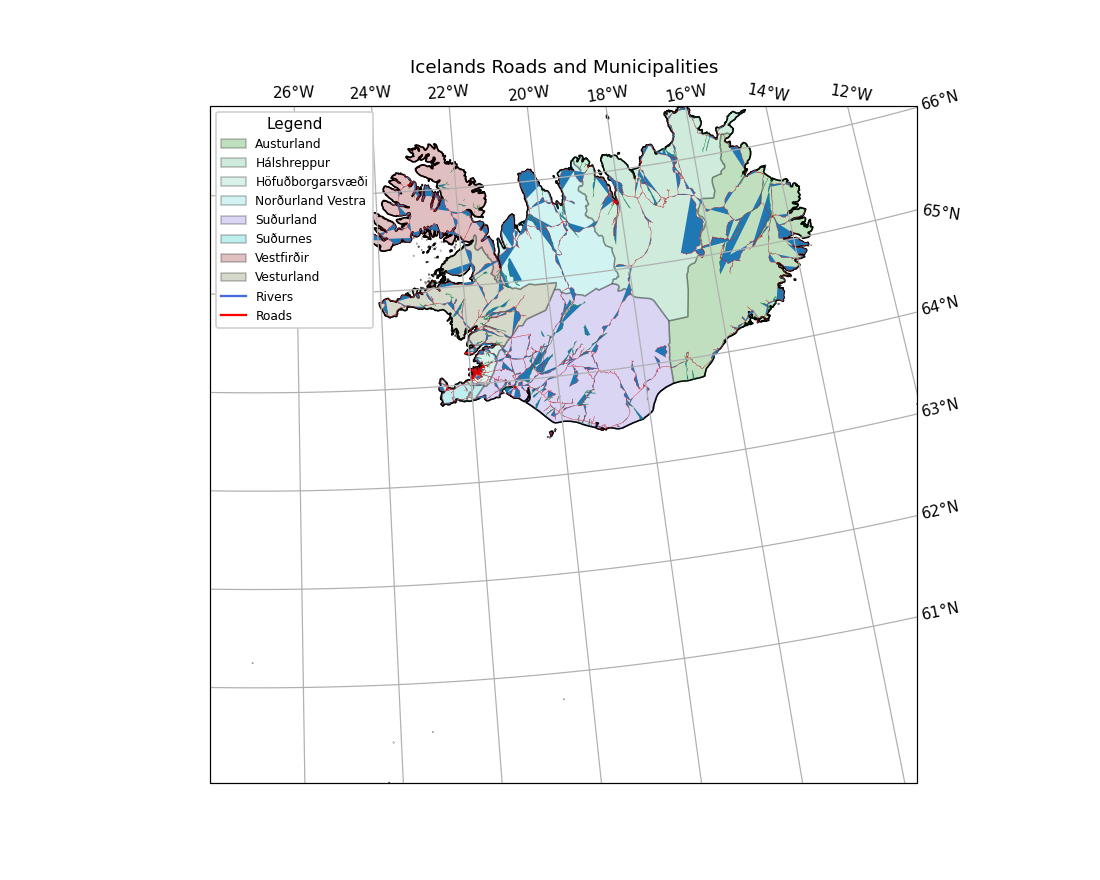

In [8]:
#Colours and boundaries are added to the map by name and location 
county_colors = ['g','mediumseagreen','mediumaquamarine','mediumturquoise','slateblue','c','maroon','darkolivegreen']

county_names = list(counties.NAME_1.unique())
county_names.sort()

for i, name in enumerate(county_names):
    feat = ShapelyFeature(counties['geometry'][counties['NAME_1'] == name], myCRS, 
                          edgecolor='k',
                          facecolor=county_colors[i],
                          linewidth=1,
                          alpha=0.25)
    ax.add_feature(feat)
    
myFig


<IPython.core.display.Javascript object>


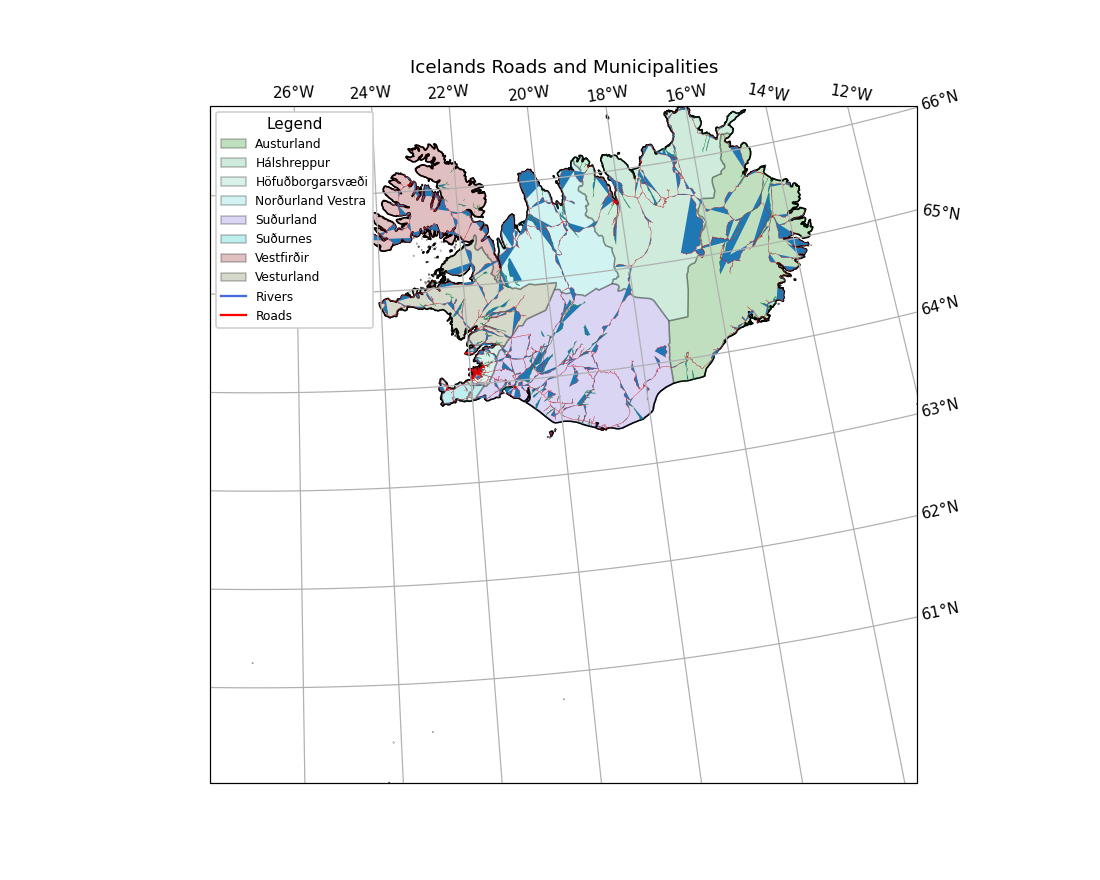

In [9]:
#Features are added using Shapely for rivers and roads. Including line colour and width.
river_feat = ShapelyFeature(rivers['geometry'], myCRS,
                            edgecolor='green',
                            linewidth=0.2)
ax.add_feature(river_feat)
roads_feat= ShapelyFeature(roads['geometry'], myCRS,
                            edgecolor='red',
                             linewidth=0.2)

ax.add_feature(roads_feat)

myFig

<IPython.core.display.Javascript object>


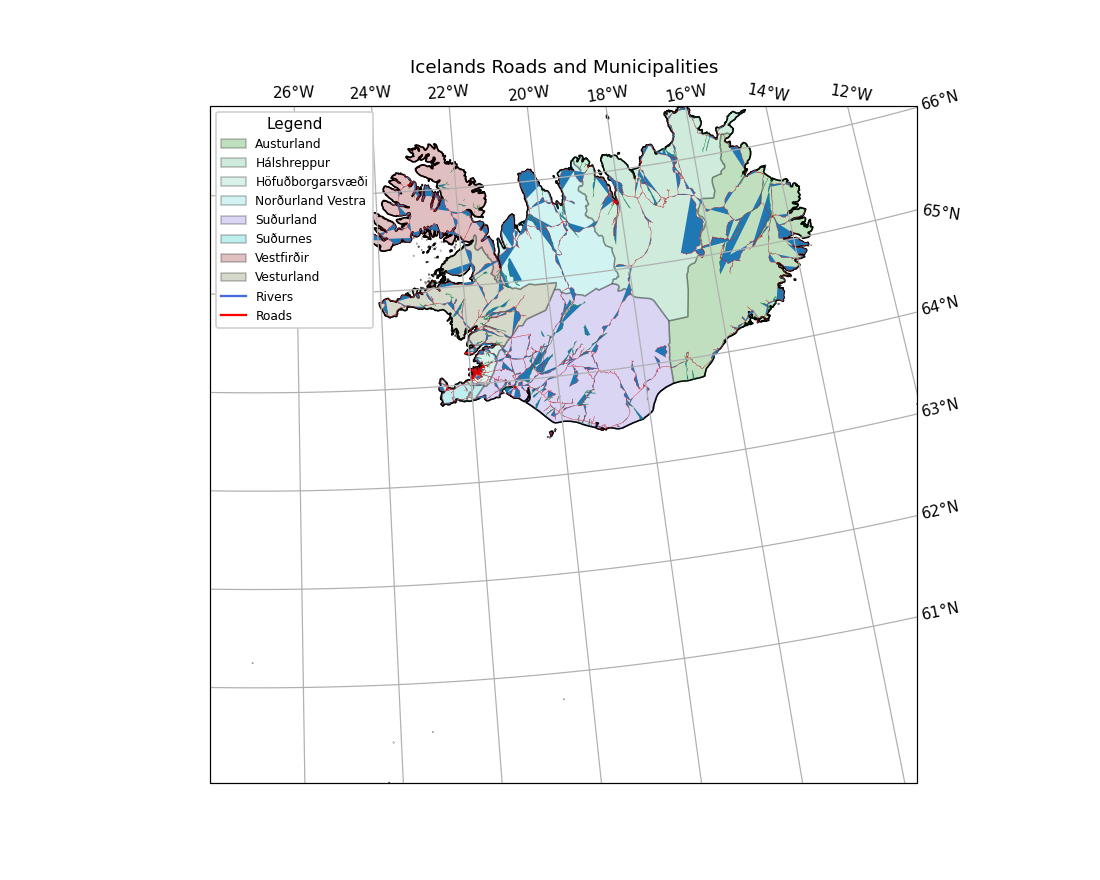

In [10]:
# Generate a list of handles for the county data sets
county_handles = generate_handles(counties.NAME_1.unique(), county_colors, alpha=0.25)

river_handle = [mlines.Line2D([], [], color='royalblue')]

roads_handle = [mlines.Line2D([],[], color='red')]

# Update the county name for title capitilisation
nice_names = [name.title() for name in county_names]

# Make a legend listing the feautures, county names, rivers and roads'ax.legend()'
handles = county_handles + river_handle + roads_handle

labels = nice_names + ['Rivers', 'Roads']

leg = ax.legend(handles, labels, title='Legend', title_fontsize=10, 
                 fontsize=8, loc='upper left', frameon=True, framealpha=1)
# Add a map title
ax.set(title='Icelands Roads and Municipalities')

myFig

<IPython.core.display.Javascript object>


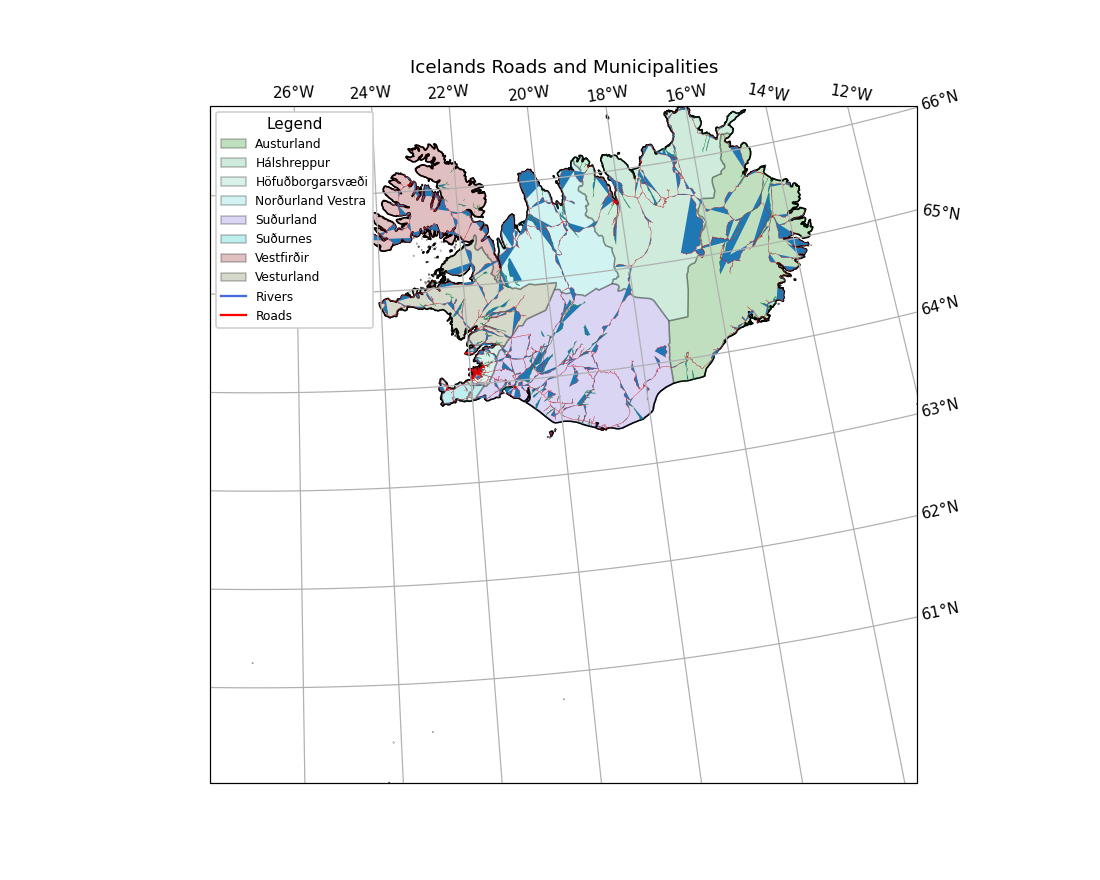

In [11]:
# Add gridlines to the map 
gridlines = ax.gridlines(draw_labels=True,
                         xlocs=[-26,-24,-22,-20,-18,-16,-14,-12], 
                         ylocs=[66,65,64,63,62,61])
gridlines.left_labels = False # turn off the left-side labels
gridlines.bottom_labels = False # turn off the bottom labels
ax.set_extent([xmin, xmax, ymin, ymax], crs=myCRS)

myFig

In [12]:
myFig.savefig('Iceland_counties.png', dpi=300)

---------------------------------------------------- Section 2 -------------------------------------------------------------

In [ ]:
"""This section shows how to do a spatial join using a LineString and clip data sets together"""
# Load data into a GeoPandasDataframe. In this case we are looking at the 'waterways' in Iceland
df = gpd.read_file('Iceland\waterways.shp').to_crs(32626)
df.head()
df

In [ ]:
# Load the counties data set
counties = gpd.read_file ('Iceland/ISL_adm1.shp').to_crs(32626)

In [ ]:
# Check that both datatsets are going to work in a join with the CRS (they both need to be the same)
rivers.crs
counties.crs

In [ ]:
# For large data sets you can write a summery like this
rivers[rivers['type'] == 'river']

In [ ]:
# Here we look at the length of the rivers using the 'LineString' geometry
for i, row in rivers.iterrows(): 
    rivers.loc[i, 'Length'] = row['geometry'].length 
    
print(rivers.head()) 

In [ ]:
# Here we calculate the total length of the features using '.sum()'
sum_rivers = rivers['Length'].sum()

sum_mainrivers = rivers[rivers['type'] == 'river']['Length'].sum()

print('{:.2f} total m of waterways'.format(sum_rivers))
print('{:.2f} total m of rivers'.format(sum_mainrivers))

In [ ]:
#'groupby' allows us to join collums in a data set for analysis or calculations
rivers.groupby(['type'])['Length'].sum() / 1000 

In [ ]:
# 's.join' is a fucntion that can joing multiple datasets
join = gpd.sjoin(counties, rivers, how='inner', lsuffix='left', rsuffix='right')
join # show the joined table

In [ ]:
# Here we caculate the total length of rivers by county.
join_total = join['Length'].sum()
print(join.groupby(['NAME_1', 'type'])['Length'].sum() / 1000) 

print(sum_rivers)
print(join_total)

In [ ]:
# To clip datasets together we use 'gpd.clip'
clipped = [] 
for county in counties['NAME_1'].unique():
    tmp_clip = gpd.clip(rivers, counties[counties['NAME_1'] == county]) 
    for i, row in tmp_clip.iterrows():
        tmp_clip.loc[i, 'type'] = row['geometry'].length 
        tmp_clip.loc[i, 'NAME_1'] = county 
    clipped.append(tmp_clip) 


clipped_gdf = gpd.GeoDataFrame(pd.concat(clipped))
clip_total = clipped_gdf['Length'].sum()

print(clip_total)
print (clipped_gdf)

In [ ]:
# Export clipped data to the data folder as a csv file
clipped_gdf.to_csv(r'Iceland\Clipped.csv')

-----------------------------------------------  Section 3 ----------------------------------------------- 

In [ ]:
'''This section shows how to make a population chlopopeth map and calculate popoulation density generating a scatter chart'''
# First check the CRS of the counties data set
counties.crs

In [ ]:
#Create figure parameters and set CRS and projection
plt.figure(1)

myFig2 = plt.figure(figsize=(9, 9)) 

myCRS = ccrs.UTM(26)  

ax = plt.axes(projection=ccrs.Mercator()) 

In [ ]:
# Insert a colour bar to the right side of the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)

In [ ]:
# View the population data set
population = gpd.read_file('Iceland/population.shp')
print(population)

In [ ]:
# Plot population data onto the axis
population_plot=population.plot(column='Population', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='r')

population_plot = population.plot(column='Population', ax=ax, vmin=300, vmax=300000, cmap='viridis',
                      legend=True, cax=cax, legend_kwds={'label': 'Resident Population'})

population_outlines = ShapelyFeature(population['geometry'], myCRS, edgecolor='r', facecolor='none')

# Add an outline to the population feature on the map
ax.add_feature(population_outlines)

population_handles = generate_handles([''], ['none'], edge='r')

# Apply title and county legend
ax.set(title='Icelands Resident population')

ax.legend(population_handles, ['County Boundaries'], fontsize=12, loc='lower center', framealpha=1)

myFig2

In [ ]:
myFig2.savefig('Iceland_population.png',dpi=300)